# Exploratory data analysis

## Importing libraries and reading the dataframe

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

/home/katsiaryna/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv("../data/movies.csv", header=0, sep=",", lineterminator="\n")

In [3]:
dataset.head()

,genre_ids,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[28, 53, 80]",False,/h8gHn0OzBoaefsYseUByqsmEDMY.jpg,"{'id': 404609, 'name': 'John Wick Collection',...",90000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://johnwick.movie,603692,tt10366206,en,...,2023-03-22,426769198,170,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"No way back, one way out.",John Wick: Chapter 4,False,7.986,2274
1,"[16, 10751, 12, 14, 35]",False,/2klQ1z1fcHGgQPevbEQdkCnzyuS.jpg,NaN,100000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",https://www.thesupermariobros.movie,502356,tt6718170,en,...,2023-04-05,1278766975,92,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Super Mario Bros. Movie,False,7.800,3793
2,"[28, 80, 53]",False,/4t0oBFrJyweYPt0hocW6RUa0b6H.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",340000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://fastxmovie.com,385687,tt5433140,en,...,2023-05-17,512000000,142,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,The end of the road begins.,Fast X,False,7.081,611
3,"[53, 27]",False,/aAgGrfBwna1nO4M2USxwFgK5O0t.jpg,NaN,15000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",https://www.evildeadrisemovie.com,713704,tt13345606,en,...,2023-04-12,141512122,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Mommy loves you to death.,Evil Dead Rise,False,7.072,1407
4,"[12, 10751, 14, 10749]",False,/hJoMSAltRx5xvlAXvKyDdugjucJ.jpg,NaN,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",https://movies.disney.com/the-little-mermaid-2023,447277,tt5971474,en,...,2023-05-18,185800000,135,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Watch and you'll see, some day I'll be, part o...",The Little Mermaid,False,6.116,285


In [4]:
dataset.columns

Index(['genre_ids', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

## 1. Unneded columns

In [5]:
dataset["backdrop_path"][0], dataset["poster_path"][0]

('/h8gHn0OzBoaefsYseUByqsmEDMY.jpg', '/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg')

In [6]:
dataset["id"][0], dataset["imdb_id"][0]

(603692, 'tt10366206')

In [7]:
dataset["genres"][0], dataset["genre_ids"][0]

("[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}]",
 '[28, 53, 80]')

In [8]:
dataset["original_title"][0], dataset["title"][0]

('John Wick: Chapter 4', 'John Wick: Chapter 4')

In [9]:
dataset["belongs_to_collection"].isnull().sum()

7128

In [10]:
dataset["homepage"].isnull().sum()

5950

In [11]:
dataset["adult"].value_counts()

adult
False    10000
Name: count, dtype: int64

In [12]:
dataset["video"].value_counts()

video
False    10000
Name: count, dtype: int64

## 2. Numeric columns

In [13]:
dataset["budget"].describe()

count    1.000000e+04
mean     1.962569e+07
std      3.863064e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.040000e+05
75%      2.200000e+07
max      4.600000e+08
Name: budget, dtype: float64

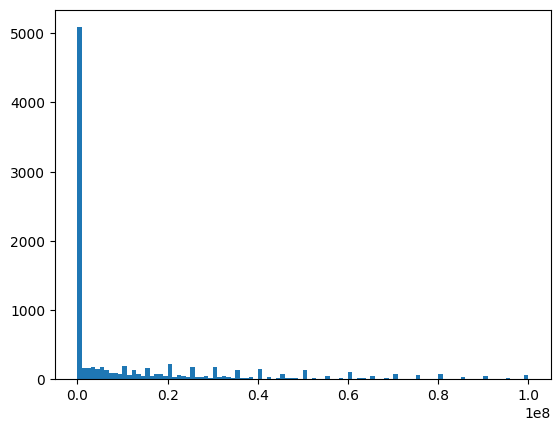

In [14]:
plt.hist(dataset["budget"], bins=100, range=(0, 100000000))
plt.show()

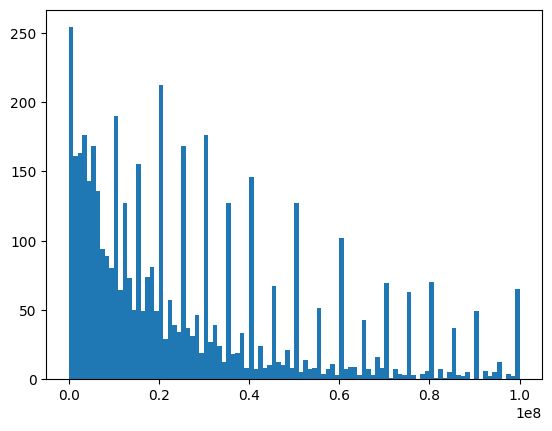

In [15]:
non_zero_budget = dataset["budget"][dataset["budget"] != 0]
plt.hist(non_zero_budget, bins=100, range=(0, 100000000))
plt.show()

In [16]:
dataset["popularity"].describe()

count    10000.000000
mean        32.522463
std        126.046001
min          7.036000
25%         14.809750
50%         19.036000
75%         28.367000
max       8361.829000
Name: popularity, dtype: float64

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,  57., 141., 232.,
        407., 518., 605., 646., 702., 635., 591., 422., 433., 387., 314.,
        298., 232., 215., 209., 176., 194., 149., 145., 103.,  95., 104.,
         82.,  99.,  89.,  68.,  75.,  73.,  53.,  70.,  66.,  48.,  46.,
         40.,  41.,  45.,  38.,  45.,  33.,  32.,  24.,  23.,  36.,  27.,
         23.,  23.,  17.,  22.,   9.,  26.,  27.,  14.,  21.,  21.,  16.,
         20.,  15.,  17.,  11.,  12.,  13.,   8.,  18.,  15.,  16.,  11.,
          4.,   7.,   6.,   7.,  15.,   7.,   5.,   9.,   5.,   5.,   9.,
          3.,   2.,   5.,   3.,   4.,   7.,   8.,   8.,  11.,   1.,   3.,
          1.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

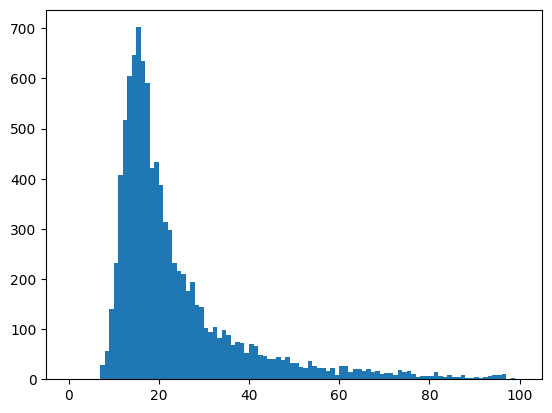

In [17]:
plt.hist(dataset["popularity"], bins=100, range=(0, 100))

In [18]:
dataset["revenue"].describe()

count    1.000000e+04
mean     6.012848e+07
std      1.545468e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.167742e+06
75%      5.009846e+07
max      2.923706e+09
Name: revenue, dtype: float64

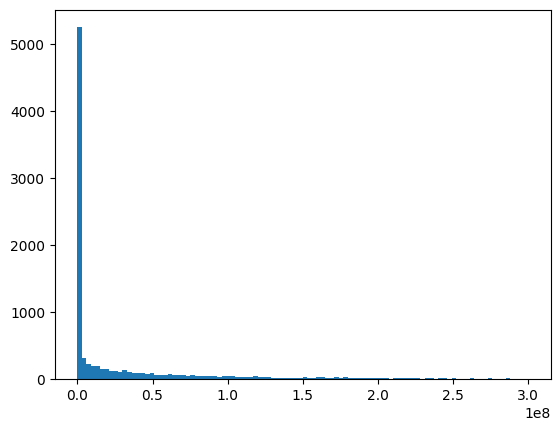

In [19]:
plt.hist(dataset["revenue"], bins=100, range=(0, 300000000))
plt.show()

In [20]:
non_zero_revenue = dataset["revenue"][dataset["revenue"] != 0]

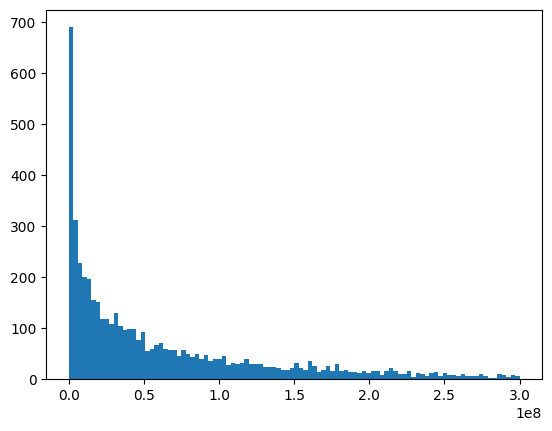

In [21]:
plt.hist(non_zero_revenue, bins=100, range=(0, 300000000))
plt.show()

In [22]:
dataset["runtime"].describe()

count    10000.000000
mean       100.296000
std         28.434385
min          0.000000
25%         90.000000
50%        100.000000
75%        114.000000
max        400.000000
Name: runtime, dtype: float64

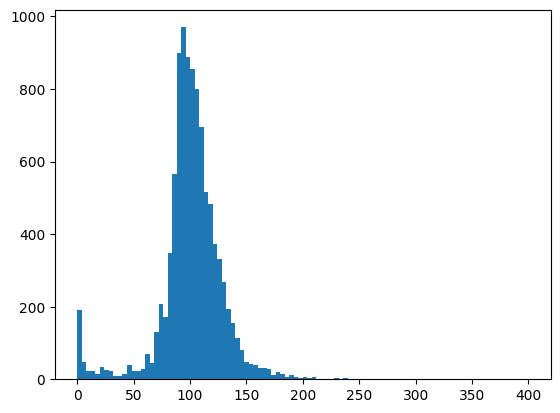

In [23]:
plt.hist(dataset["runtime"], bins=100, range=(0, 400))
plt.show()

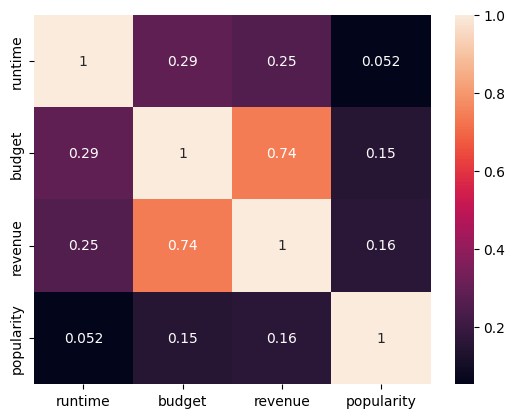

In [24]:
df_correlation = dataset[["runtime", "budget", "revenue", "popularity"]]
corr_matrix = df_correlation.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 3. Categorical columns

## 3.1 Simple categorical columns

In [25]:
dataset["status"].value_counts()

status
Released           9910
Post Production      38
In Production        29
Planned              21
Rumored               2
Name: count, dtype: int64

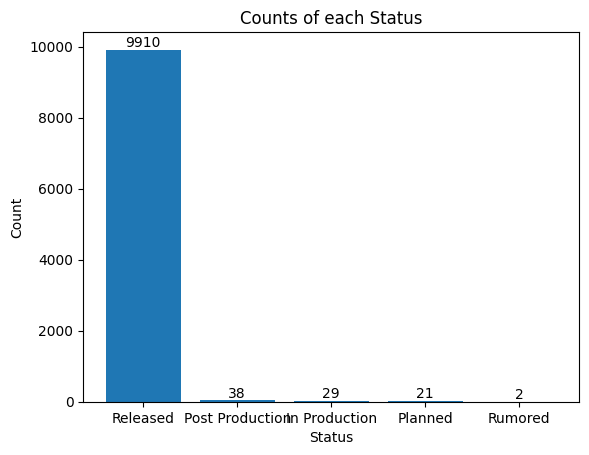

In [26]:
status_counts = dataset["status"].value_counts()

plt.bar(status_counts.index, status_counts.values)

for i, count in enumerate(status_counts.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Counts of each Status")

plt.show()

In [27]:
dataset["original_language"]

0       en
1       en
2       en
3       en
4       en
        ..
9995    en
9996    en
9997    en
9998    ja
9999    es
Name: original_language, Length: 10000, dtype: object

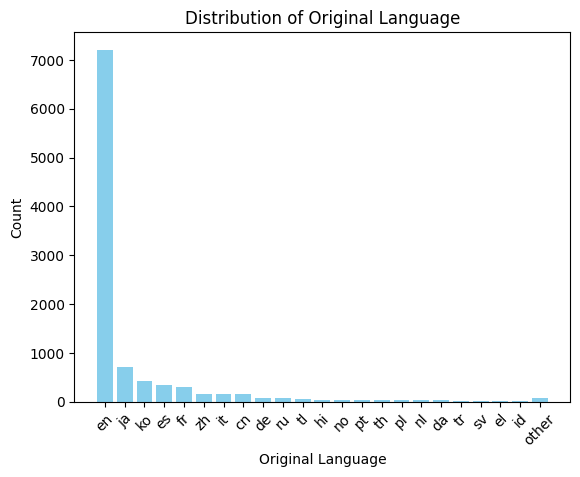

In [28]:
language_counts = dataset["original_language"].value_counts()
total_count = language_counts.sum()

threshold = total_count * 0.001
languages_below_threshold = language_counts[language_counts < threshold]
language_counts["other"] = languages_below_threshold.sum()
language_counts = language_counts.drop(languages_below_threshold.index)


plt.bar(language_counts.index, language_counts, color="skyblue")
plt.xlabel("Original Language")
plt.ylabel("Count")
plt.title("Distribution of Original Language")
plt.tick_params(axis="x", rotation=45)
plt.show()

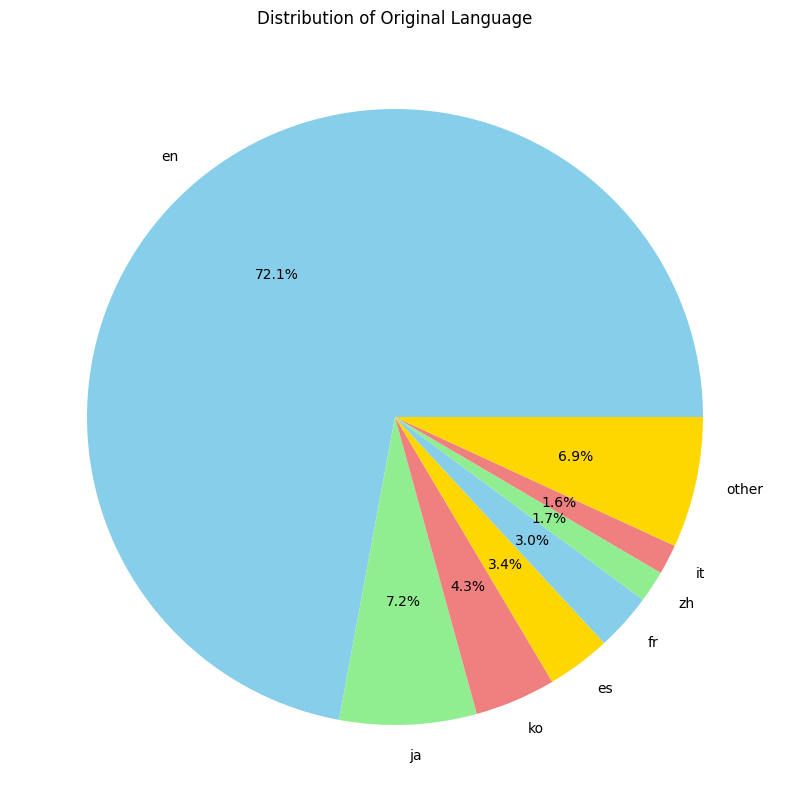

In [29]:
language_counts = dataset["original_language"].value_counts()
total_count = language_counts.sum()

threshold = total_count * 0.015
languages_below_threshold = language_counts[language_counts <= threshold]
language_counts["other"] = languages_below_threshold.sum()
language_counts = language_counts.drop(languages_below_threshold.index)

plt.figure(figsize=(10, 10))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct="%1.1f%%",
    colors=["skyblue", "lightgreen", "lightcoral", "gold"],
)
plt.title("Distribution of Original Language")
plt.show()

In [30]:
desired_languages = ["en", "ja", "ko", "es", "fr"]
dataset["language_category"] = dataset["original_language"].apply(
    lambda x: x if x in desired_languages else "other"
)
one_hot = pd.get_dummies(dataset["language_category"])

## 3.2 Categorical columns with lists

In [31]:
dataset["genre_ids"]

0                  [28, 53, 80]
1       [16, 10751, 12, 14, 35]
2                  [28, 80, 53]
3                      [53, 27]
4        [12, 10751, 14, 10749]
                 ...           
9995                   [80, 53]
9996                   [28, 53]
9997                       [37]
9998                   [53, 18]
9999                       [18]
Name: genre_ids, Length: 10000, dtype: object

In [32]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(dataset["genre_ids"].apply(ast.literal_eval))

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
genres = mlb.fit_transform(dataset["genre_ids"].apply(ast.literal_eval))
genres = pd.DataFrame(genres, columns=mlb.classes_)
genres.sum().sort_values(ascending=False)

18       3765
35       2944
28       2726
53       2516
12       1883
10749    1671
27       1443
16       1403
10751    1354
14       1352
878      1239
80       1237
9648      833
36        403
10752     299
10402     257
10770     201
99        169
37        158
dtype: int64

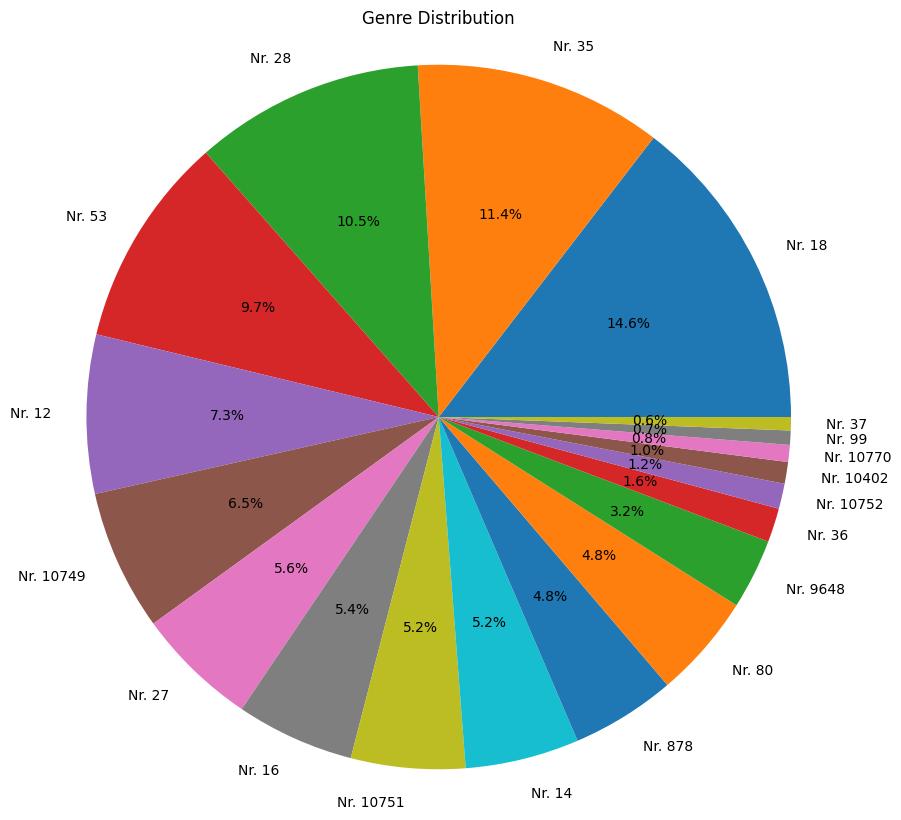

In [34]:
genre_counts = genres.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
genre_counts.index = genre_counts.index.map(lambda x: "Nr. " + str(x))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct="%1.1f%%")
plt.title("Genre Distribution")
plt.axis("equal")
plt.show()

## 3.3 Categorical columns with dictionaries

In [35]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(
    dataset["production_countries"]
    .apply(ast.literal_eval)
    .apply(lambda x: [y["iso_3166_1"] for y in x])
)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
mlb.classes_

array(['AE', 'AF', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG', 'BO', 'BR',
       'BS', 'BW', 'BY', 'CA', 'CH', 'CL', 'CN', 'CO', 'CY', 'CZ', 'DE',
       'DK', 'DO', 'EE', 'EG', 'ES', 'ET', 'FI', 'FR', 'GB', 'GE', 'GH',
       'GP', 'GR', 'GT', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ',
       'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KH', 'KR', 'KZ', 'LB',
       'LI', 'LT', 'LU', 'LV', 'MA', 'MO', 'MT', 'MW', 'MX', 'MY', 'NA',
       'NG', 'NL', 'NO', 'NZ', 'PA', 'PE', 'PH', 'PL', 'PR', 'PS', 'PT',
       'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SB', 'SE', 'SG', 'SI', 'SK',
       'SN', 'SU', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'VE', 'VN',
       'XC', 'XG', 'YU', 'ZA'], dtype=object)

In [37]:
dataset["production_countries"][0]

"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [38]:
dataset["new_spoken_langs"] = (
    dataset["spoken_languages"].apply(ast.literal_eval).apply(lambda x: [y["iso_639_1"] for y in x])
)

In [39]:
dataset["new_spoken_langs"]

0       [cn, fr, en, es, it, ja, la, ru]
1                                   [en]
2                           [it, pt, es]
3                                   [en]
4                                   [en]
                      ...               
9995                                [en]
9996                                [en]
9997                                [en]
9998                                [ja]
9999                                [es]
Name: new_spoken_langs, Length: 10000, dtype: object

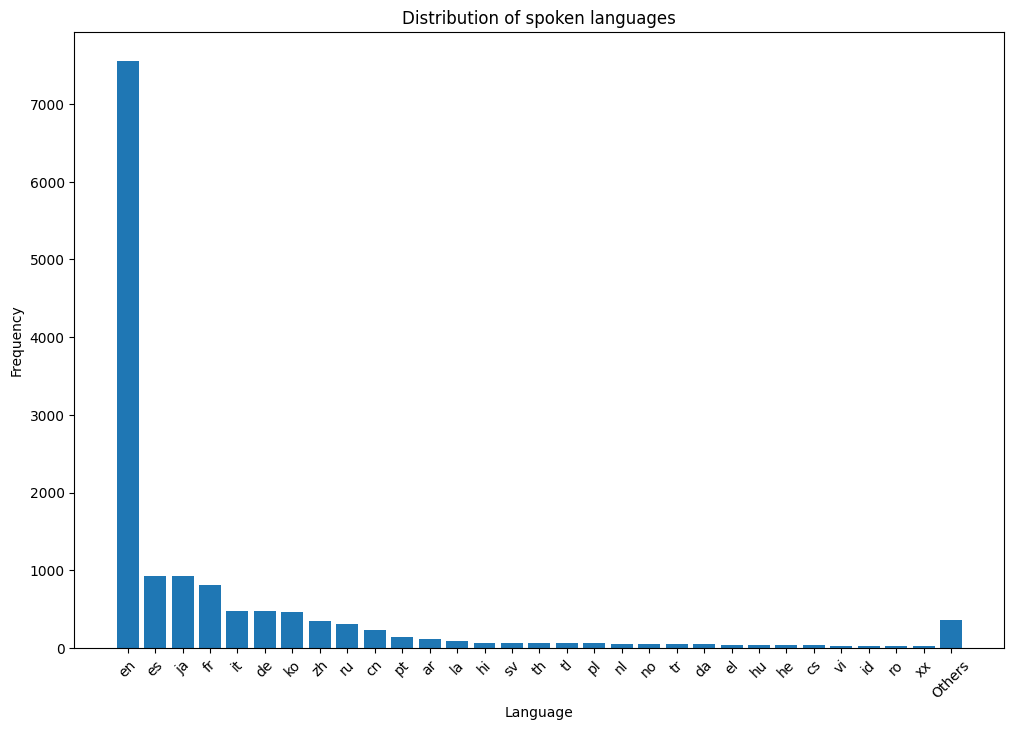

In [40]:
languages = [lang for sublist in dataset["new_spoken_langs"] for lang in sublist]

language_counts = pd.Series(languages).value_counts()

threshold = 20

others_count = language_counts[language_counts < threshold].sum()
language_counts = language_counts[language_counts >= threshold]
language_counts["Others"] = others_count

plt.figure(figsize=(12, 8))
plt.bar(language_counts.index, language_counts.values)

plt.xlabel("Language")
plt.ylabel("Frequency")
plt.title("Distribution of spoken languages")
plt.xticks(rotation=45)
plt.show()

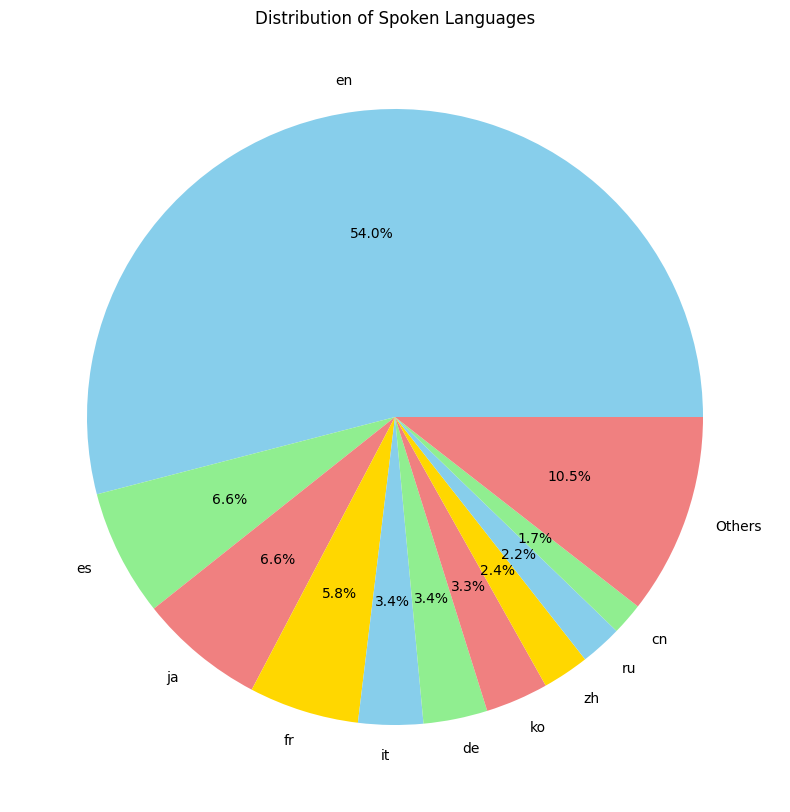

In [41]:
languages = [lang for sublist in dataset["new_spoken_langs"] for lang in sublist]

language_counts = pd.Series(languages).value_counts()
total_count = language_counts.sum()

threshold = total_count * 0.015
languages_below_threshold = language_counts[language_counts <= threshold]
language_counts["Others"] = languages_below_threshold.sum()
language_counts = language_counts.drop(languages_below_threshold.index)

plt.figure(figsize=(10, 10))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct="%1.1f%%",
    colors=["skyblue", "lightgreen", "lightcoral", "gold"],
)
plt.title("Distribution of Spoken Languages")
plt.show()

In [42]:
dataset["production_countries"][0]

"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [43]:
dataset["new_production_countries"] = (
    dataset["production_countries"]
    .apply(ast.literal_eval)
    .apply(lambda x: [y["iso_3166_1"] for y in x])
)

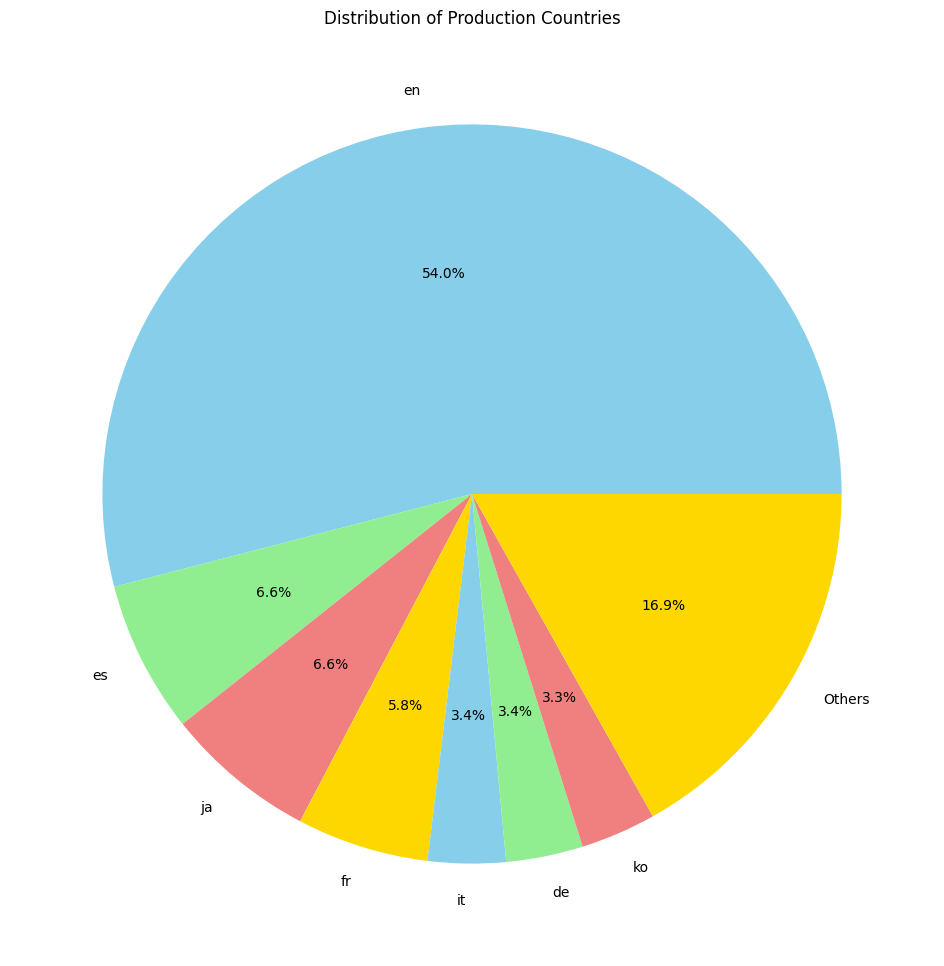

In [44]:
countries = [country for sublist in dataset["new_production_countries"] for country in sublist]

country_counts = pd.Series(languages).value_counts()
total_count = country_counts.sum()

threshold = total_count * 0.025
countries_below_threshold = country_counts[country_counts < threshold]
country_counts["Others"] = countries_below_threshold.sum()
country_counts = country_counts.drop(countries_below_threshold.index)

plt.figure(figsize=(12, 12))
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct="%1.1f%%",
    colors=["skyblue", "lightgreen", "lightcoral", "gold"],
)
plt.title("Distribution of Production Countries")
plt.show()

In [45]:
dataset["new_production_companies"] = (
    dataset["production_companies"].apply(ast.literal_eval).apply(lambda x: [y["id"] for y in x])
)

        count
33        509
174       508
4         381
5         380
25        349
...       ...
58254       1
8891        1
19865       1
55369       1
105989      1

[9973 rows x 1 columns]
        count Count Range
33        509        128+
174       508        128+
4         381        128+
5         380        128+
25        349        128+
...       ...         ...
58254       1         0-1
8891        1         0-1
19865       1         0-1
55369       1         0-1
105989      1         0-1

[9973 rows x 2 columns]


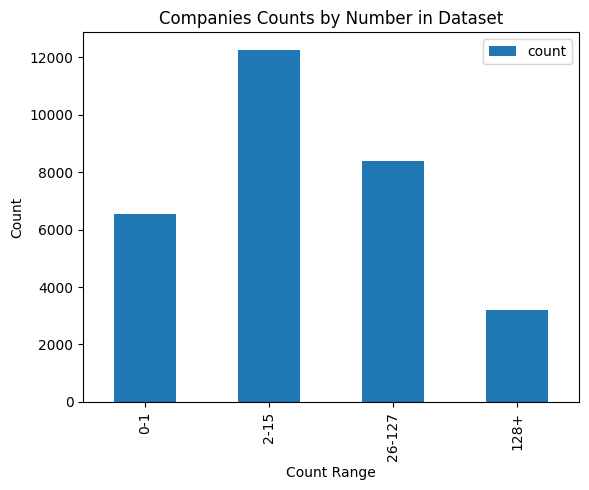

In [47]:
languages = [lang for sublist in dataset["new_production_companies"] for lang in sublist]

language_counts = pd.Series(languages).value_counts()
total_count = language_counts.sum()
count_ranges = ["0-1", "2-15", "26-127", "128+"]

bins = [0, 2, 16, 128, float("inf")]

language_counts_df = pd.DataFrame(language_counts)
print(language_counts_df)
language_counts_df["Count Range"] = pd.cut(
    language_counts_df["count"], bins=bins, labels=count_ranges, right=False
)
print(language_counts_df)

grouped_counts = language_counts_df.groupby("Count Range").sum()

fig, ax = plt.subplots()
grouped_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Count Range")
ax.set_ylabel("Count")
ax.set_title("Companies Counts by Number in Dataset")

plt.show()

# 4. Columns with simple transformations

# 4.1 Extracting year from date

In [49]:
year_count = pd.to_datetime(dataset["release_date"]).apply(lambda x: x.year).value_counts()

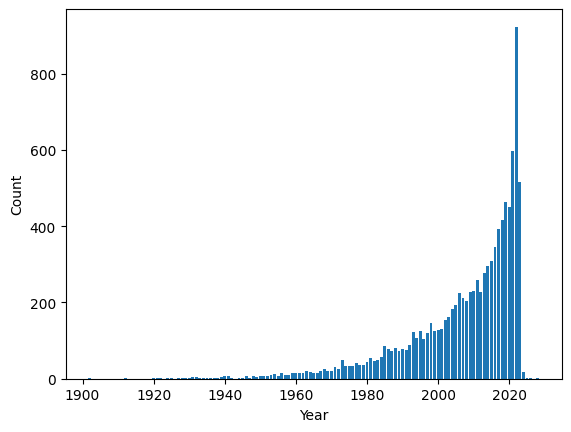

In [51]:
plt.bar(year_count.index, year_count.values)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

##  4.2 Convertig to boolean

In [52]:
homepage_counts = dataset["homepage"].notnull().value_counts()

In [53]:
homepage_counts

homepage
False    5950
True     4050
Name: count, dtype: int64

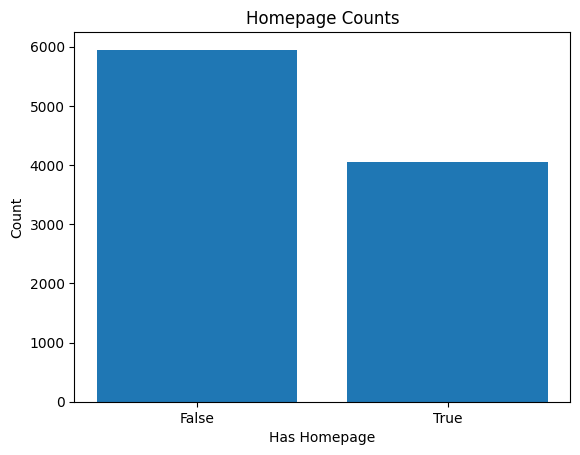

In [54]:
labels = ["False", "True"]
plt.bar(labels, homepage_counts.values)
plt.xlabel("Has Homepage")
plt.ylabel("Count")
plt.title("Homepage Counts")
plt.show()

In [55]:
collection_counts = dataset["belongs_to_collection"].notnull().value_counts()

In [56]:
collection_counts

belongs_to_collection
False    7128
True     2872
Name: count, dtype: int64

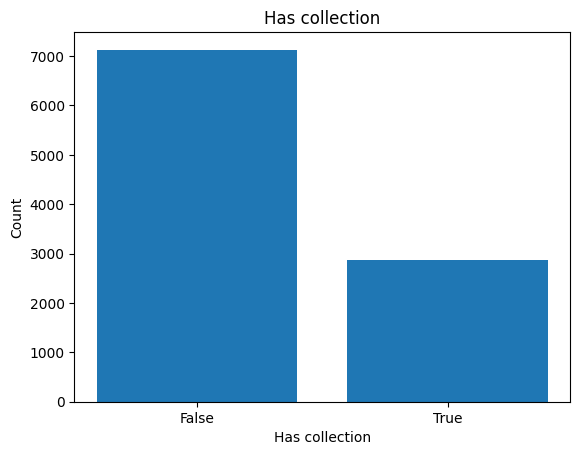

In [57]:
labels = ["False", "True"]
plt.bar(labels, collection_counts.values)
plt.xlabel("Has collection")
plt.ylabel("Count")
plt.title("Has collection")
plt.show()